# Description of methodology
# Classification algorithms
# Logistic regression
From [Python Machine Learning - Second Edition By Sebastian Raschka, Vahid Mirjalili](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning-second-edition)

## Modeling class probabilities via logistic regression
### Logistic regression intuition and conditional probabilities
Although the perceptron rule offers a nice and easygoing introduction to machine learning algorithms for classification, its biggest disadvantage is that it never converges if the classes are not perfectly linearly separable. Intuitively, we can think of the reason as the weights are continuously being updated since there is always at least one misclassified sample present in each epoch. Of course, we can change the learning rate and increase the number of epochs, but the perceptron will never converge on some datasets. To address this issue, we can use a more powerful algorithm for linear and binary classification problems: logistic regression. Note that, in spite of its name, logistic regression is a model for classification, not regression.

**Logistic regression** is a classification model that is very easy to implement but **performs very well on linearly separable classes**. It is one of the most widely used algorithms for classification in industry. Similar to the perceptron and Adaline, the logistic regression model is also a **linear model for binary classification** that **can be extended to multi-class classification**, for example, via the **OvR technique**.
### Logit function (log-odds)
To explain the idea behind logistic regression as a probabilistic model, let's first introduce the **odds ratio**: the odds in favor of a particular event. The odds ratio can be written as $\frac{p} {1-p}$ where $p$ stands for the probability of the positive event. The term **positive event** does not necessarily mean good, but refers to the **event that we want to predict**, for example, the probability that a patient has a certain disease; we can think of the positive event as class label $y=1$. We can then further define the **logit** function, which is simply the logarithm of the odds ratio (log-odds):

$ \text{logit}(p) = \log \frac{p} {(1-p)} $

Note that **log refers to the natural logarithm**, as it is the common convention in computer science. The logit function takes as input values in the range 0 to 1 and transforms them to values over the entire real-number range, which we can use to express a linear relationship between feature values and the log-odds:

$ \text{logit}( p( y = 1 | \boldsymbol{x} ) ) = w_0 x_0 + w_1 x_1 + \dots + w_m x_m = \sum \limits_{i=0}^m w_i x_i = \boldsymbol{w}^T \boldsymbol{x}$

Here, $ p( y = 1 | \boldsymbol{x} ) $ is the conditional probability that a particular sample belongs to class 1 given its features $\boldsymbol{x}$.
### Logistic sigmoid function
Now, we are actually interested in predicting the probability that a certain sample belongs to a particular class, which is the **inverse form of the logit function**. It is also called **logistic sigmoid function**, sometimes **simply abbreviated to sigmoid function** due to its characteristic S-shape:

$ \large{ \phi(z) = \frac{1} {1 + e^{-z}} } $

Here z is the net input, the linear combination of weights and sample features, 

$ z = \boldsymbol{w}^T \boldsymbol{x} = w_0 x_0 + w_1 x_1 + \dots + w_m x_m $

where $w_0$ refers to the bias unit, and is an additional input value that we provide $x_0$, which is set equal to 1.

Now let us simply plot the sigmoid function for some values in the range -7 to 7 to see how it looks:

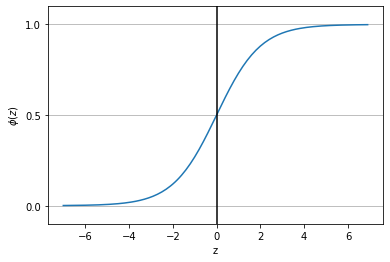

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

We can see that $\phi(z)$ approaches 1 if z goes towards infinity ($z \to \infty$) since $e^{-z}$ becomes very small for large values of z. Similarly, $\phi(z)$ goes towards 0 for $z \to -\infty$ as a result of an increasingly large denominator. Thus, we conclude that this sigmoid function takes real number values as input and transforms them into values in the range [0, 1] with an intercept at $\phi(z) = 0.5$.
### Logistic regression compared to Adaline
To build some intuition for the logistic regression model, we can relate it to Adaline, where we used the identity function $\phi(z) = z$ as the activation function. In logistic regression, this activation function simply becomes the sigmoid function that we defined earlier. The difference between Adaline and logistic regression is illustrated in the following figure:

![log_reg](img/lr_vs_adaline.jpg)
### Interpreting output of the sigmoid function
The output of the sigmoid function is then interpreted as the probability of a particular sample belonging to class 1, $\phi(z) = P( y = 1 | \boldsymbol{x}; \boldsymbol{w}) $, given its features x parameterized by the weights w. For example, if we compute $\phi(z) = 0.8$ for a particular flower sample, it means that the chance that this sample is an Iris-versicolor flower is 80 percent. Therefore, the probability that this flower is an Iris-setosa flower can be calculated as $ P( y = 0 | \boldsymbol{x}; \boldsymbol{w}) = 1 - P( y = 0 | \boldsymbol{x}; \boldsymbol{w}) = 0.2 $ or 20 percent. The predicted probability can then simply be converted into a binary outcome via a threshold function: 

$ \hat{y} = \begin{cases} 1 & {\text{if }}\ \phi(z) \geq 0.5, \\ 0 & {\text{otherwise}} \end{cases}$

If we look at the preceding plot of the sigmoid function, this is equivalent to the following:

$ \hat{y} = \begin{cases} 1 & {\text{if }}\ z \geq 0.0, \\ 0 & {\text{otherwise}} \end{cases}$

In fact, there are many applications where we are not only interested in the predicted class labels, but where the estimation of the class-membership probability is particularly useful (the output of the sigmoid function prior to applying the threshold function). Logistic regression is used in weather forecasting, for example, not only to predict if it will rain on a particular day but also to report the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why logistic regression enjoys great popularity in the field of medicine.

## Learning the weights of the logistic cost function
We saw how we could use the logistic regression model to predict probabilities and class labels; now, let us briefly talk about how we fit the parameters of the model, for instance the weights **w**. We defined the sum-squared-error cost function as follows:

$ J(\boldsymbol{w}) = \sum \limits_i \frac{1} {2} \left( \phi \left( z^{(i)} \right) - y^{(i)} \right) ^2$

We minimized this function in order to learn the weights w for our Adaline classification model. To explain how we can derive the cost function for logistic regression, let's first define the likelihood L that we want to maximize when we build a logistic regression model.
### Log-likelihood function
To explain how we can derive the cost function for logistic regression, let's first define the likelihood L that we want to maximize when we build a logistic regression model, assuming that the individual samples in our dataset are independent of one another. The formula is as follows:

$ L(\boldsymbol{w}) = P(y|\boldsymbol{x};\boldsymbol{w}) = \prod \limits_{i=1}^n P \left( y^{(i)} | \boldsymbol{x}^{(i)}; \boldsymbol{w}\right) = \prod \limits_{i=1}^{n} \left( \phi \left( z^{(i)} \right) \right)^{y^{(i)}} \left( 1 - \phi \left( z^{(i)} \right) \right)^{1 - y^{(i)}}$

In practice, it is easier to maximize the (natural) log of this equation, which is called the **log-likelihood function**:

$ l(\boldsymbol{w}) = \log L( \boldsymbol{w} ) = \sum \limits_{i=1}^n \left[ y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) + \left( 1 - y^{(i)} \right) \log \left( 1 - \phi \left( z^{(i)} \right) \right) \right] $

Firstly, applying the log function reduces the potential for numerical underflow, which can occur if the likelihoods are very small. Secondly, we can convert the product of factors into a summation of factors, which makes it easier to obtain the derivative of this function via the addition trick, as you may remember from calculus.

### Maximizing log-likelihood using Gradient Descent
Now we could use an optimization algorithm such as gradient ascent to maximize this log-likelihood function. Let's rewrite the log-likelihood as a cost function J that can be minimized using gradient descent:

$ J( \boldsymbol{w} ) = \sum \limits_{i=1}^n \left[ -  y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - \phi \left( z^{(i)} \right) \right) \right] $

To get a better grasp of this cost function, let us take a look at the cost that we calculate for one single-sample training instance:

$ J( \phi(z), y; \boldsymbol{w}) = - y \log \left( \phi(z) \right) - (1 - y) \log (1 - \phi(z) )$

Looking at the equation, we can see that the first term becomes zero if $y=0$, and the second term becomes zero if $y=1$:

$ J( \phi(z), y; \boldsymbol{w} )= \begin{cases} - \log ( \phi (z) ) & {\text{if }}\ y = 1, \\ - \log ( 1 - \phi (z) ) & {\text{if }}\ y = 0 \end{cases}$

Let's write a short code snippet to create a plot that illustrates the cost of classifying a single-sample instance for different values of $\phi(z)$:

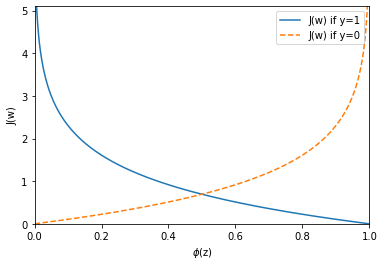

In [4]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

The resulting plot shows the sigmoid activation on the x axis, in the range `0` to `1` (the inputs to the sigmoid function were z values in the range `-10` to `10`) and the associated logistic cost on the y-axis. We can see that the cost approaches 0 (continuous line) if we correctly predict that a sample belongs to class 1. Similarly, we can see on the y-axis that the cost also approaches 0 if we correctly predict $y=0$ (dashed line). However, if the prediction is wrong, the cost goes towards infinity. The main point is that **we penalize wrong predictions with an increasingly larger cost**.
## Implementing Logistic Regression in Python
### Converting an Adaline implementation into an algorithm for logistic regression
If we were to implement logistic regression ourselves, we could simply substitute the cost function J in our Adaline implementation with the new cost function:

$ J (\boldsymbol{w}) = - \sum \limits_i y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) + \left( 1 - y^{(i)} \right) \log \left( \phi \left( z^{(i)} \right) \right) $

We use this to compute the cost of classifying all training samples per epoch. Also, we need to swap the linear activation function with the sigmoid activation and change the threshold function to return class labels 0 and 1 instead of -1 and 1. If we make those three changes to the Adaline code, we would end up with a working logistic regression implementation.

When we fit a logistic regression model, we have to keep in mind that it only works for binary classification tasks. So, let us consider only Iris-setosa and Iris-versicolor flowers (classes 0 and 1) and check that our implementation of logistic regression works:

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [7]:
import os
os.chdir('Documents/repos/nhl_draft')

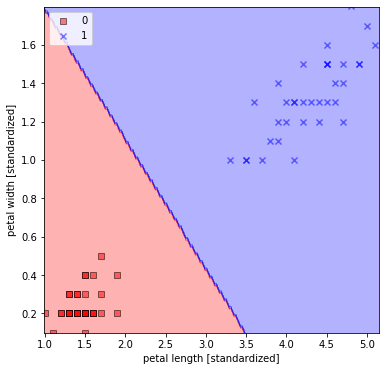

In [8]:
from src.classifiers import LogisticRegressionGD
from src.plot_utils import plot_decision_regions

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, 
                            n_iter=1000,
                            random_state=1)

lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd,
                      xlabel='petal length [standardized]',
                      ylabel='petal width [standardized]')

### The gradient descent learning algorithm for logistic regression
Using calculus, we can show that the weight update in logistic regression via gradient descent is equal to the equation that we used in Adaline. Let's start by calculating the partial derivative of the log-likelihood function with respect to the jth weight:

$ \frac{ \partial } {\partial{w_j} } l(\boldsymbol{w}) = \left( y \frac{1} {\phi(z)} - (1 - y) \frac{1} {1 - \phi(z)} \right) \frac{ \partial } {\partial w_j} \phi(z) $

Before we continue, let's also calculate the partial derivative of the sigmoid function:

$ \large{ \frac{ \partial } { \partial z } \phi(z) = \frac{ \partial } { \partial{z}} \frac{1} {1 + e^{-z}} = \frac{1} {(1 + e^{-z})^2} e^{-z} = \frac{1} {1 + e^{-z}} \left( 1 - \frac{1} {1 + e^{-z}} \right)} = \phi (z) (1 - \phi(z) )$

Now, we can re-substitute $ \frac{ \partial } { \partial z } \phi(z) = \phi (z) (1 - \phi(z) ) $ in our first equation to obtain the following:

$ \frac{ \partial } {\partial{w_j} } l(\boldsymbol{w}) = \left( y \frac{1} {\phi(z)} - (1 - y) \frac{1} {1 - \phi(z)} \right) \frac{ \partial } {\partial w_j} \phi(z) = \left( y \frac{1} {\phi(z)} - (1 - y) \frac{1} {1 - \phi(z)} \right) \phi (z) (1 - \phi(z) ) \frac{ \partial } {\partial w_j} z = \left( y ( 1 - \phi (z) ) - (1 - y) \phi (z) \right) x_j  = (y - \phi(z)) x_j $

Remember that the goal is to find the weights that maximize the log-likelihood so that we perform the update for each weight as follows:

$ w_j := w_j + \eta \sum \limits_{i=1}^n \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) x_j $

Since we update all weights simultaneously, we can write the general update rule as follows: 

$ \boldsymbol{w} := \boldsymbol{w} + \Delta \boldsymbol{w} $

We define $ \Delta \boldsymbol{w} $ as follows: $ \Delta \boldsymbol{w} = \eta \nabla l( \boldsymbol{w} ) $

Since maximizing the log-likelihood is equal to minimizing the cost function J that we defined earlier, we can write the gradient descent update rule as follows: 

$ \Delta w_j = - \eta \frac{\partial{J}} {\partial{w_j} } = \eta \sum \limits_{i=1}^n \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) x^{(i)}_j $

$ \boldsymbol{w} := \boldsymbol{w} + \Delta \boldsymbol{w}, ~ \Delta \boldsymbol{w} = - \eta \nabla J( \boldsymbol{w} ) $

This is equal to the gradient descent rule for that we previously used for Adaline.
## Training a logistic regression model with scikit-learn
Code and math in the previous subsection helped illustrate the conceptual differences between Adaline and logistic regression. For practical purposes, it is better to use `scikit-learn`'s more optimized implementation of logistic regression that also supports multi-class settings off the shelf (OvR by default). In the following code example, we will use the `sklearn.linear_model.LogisticRegression` class as well as the familiar `fit` method to train the model on all three classes in the standardized flower training dataset:
### Standardizing data to improve performance of gradient descent 
Many machine learning and optimization algorithms also require feature scaling for optimal performance, as we remember from the gradient descent example discussed for perceptron. Here, we will standardize the features using the `StandardScaler` class from `scikit-learn`'s `preprocessing` module:

Using the `fit` method, `StandardScaler` estimates the parameters μ (sample mean) and σ (standard deviation) for each feature dimension from the training data. By calling the `transform` method, we then standardize the training data using those estimated parameters $\mu$ and $\sigma$. Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Training multi-class logistic regression model

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



Accuracy on train set: 0.95
Accuracy on test set: 0.98


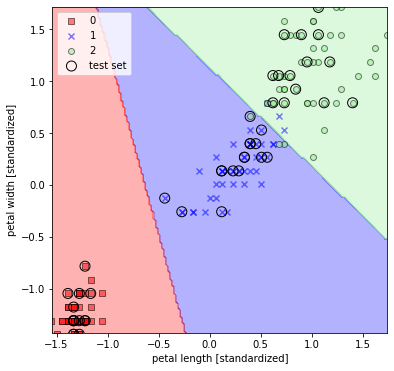

In [12]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

print('\nAccuracy on train set: %.2f' % lr.score(X_train_std, y_train))
print('Accuracy on test set: %.2f' % lr.score(X_test_std, y_test))
plot_decision_regions(X_combined_std,
                      y_combined, 
                      classifier=lr,
                      test_idx=range(105, 150),
                      xlabel='petal length [standardized]',
                      ylabel='petal width [standardized]')

## Class membership probabilities
Let's finish our discussion of class-membership probabilities. The probability that training examples belong to a certain class can be computed using the `predict_proba` method. For example, we can predict the probabilities of the first three samples in the test set as follows:

In [13]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

The first row corresponds to the class-membership probabilities of the first flower, the second row corresponds to the class-membership probabilities of the second flower, and so forth. Notice that the columns sum all up to one, as expected. 

In [14]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

The highest value in the first row is approximately 0.855, which means that the first sample belongs to class three (Iris-virginica) with a predicted probability of 85.5 percent. So, we can get the predicted class labels by identifying the largest column in each row, for example, using `NumPy`'s `argmax` function:

In [15]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

The returned class indices are shown here (they correspond to Iris-virginica, Iris-setosa, and Iris-setosa). The class labels we obtained from the preceding conditional probabilities is, of course, just a manual approach to calling the predict method directly, which we can quickly verify as follows:

In [16]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

`scikit-learn` expects a two-dimensional array as data input; thus, if we want to predict the class label of a single flower sample, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use `NumPy`'s `reshape` method to add a new dimension, as demonstrated here:

In [17]:
lr.predict(X_test_std[0, :].reshape(1, -1)) 

array([2])

## Tackling overfitting via regularization
### Model bias and variance
**Overfitting** is a common problem in machine learning, where a model performs well on training data but **does not generalize well to unseen data** (test data). If a model suffers from overfitting, we also say that the model has a **high variance**, which can be caused by having too many parameters that lead to a model that is too complex given the underlying data. Similarly, our model can also suffer from **underfitting (high bias)**, which means that our model is **not complex enough to capture the pattern** in the training data well and therefore also suffers from low performance on unseen data.

The problem of overfitting and underfitting can be best illustrated by comparing a linear decision boundary to more complex, nonlinear decision boundaries as shown in the following figure:

![overfitting](img/overfitting.jpg)

* **Variance** measures the consistency (or variability) of the model prediction for a particular sample instance if we were to retrain the model multiple times, for example, on different subsets of the training dataset. We can say **how sensitive is the model to the randomness in the training data**. 
* In contrast, **bias** measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training datasets; bias is the **measure of the systematic error** that is not due to randomness.

### Using L2 regularization to find a good bias-variance trade-off
One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. **Regularization** is a very useful method to **handle collinearity** (high correlation among features), **filter out noise** from data, and eventually **prevent overfitting**. The concept behind regularization is to introduce additional information (bias) to **penalize extreme parameter (weight) values**. The most common form of regularization is so-called **L2 regularization** (sometimes also called **L2 shrinkage** or **weight decay**), which can be written as follows:

$ \frac{\lambda} {2} ||\boldsymbol{w}||^2 = \frac{\lambda} {2} \sum \limits_{j=1}^m w_j^2 $

Here, $\lambda$ is the so-called regularization parameter. 

Regularization is another reason why feature scaling such as **standardization is important**. For regularization to work properly, we **need to ensure that all our features are on comparable scales**.

The cost function for logistic regression can be regularized by adding a simple regularization term, which will shrink the weights during model training:

$ J(\boldsymbol{w}) = \sum \limits_{i=1}^n \left[ - y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( \phi \left( z^{(i)} \right) \right) \right] + \frac{\lambda}{2} ||\boldsymbol{w}||^2 $

Via the regularization parameter $\lambda$, we can then control how well we fit the training data while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength.

The parameter `C` that is implemented for the `LogisticRegression` class in `scikit-learn` comes from a convention in support vector machines. The term `C` is directly related to the regularization parameter $\lambda$, which is **its inverse**. Consequently, decreasing the value of the inverse regularization parameter `C` means that we are increasing the regularization strength, which we can visualize by plotting the L2-regularization path for the two weight coefficients:

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

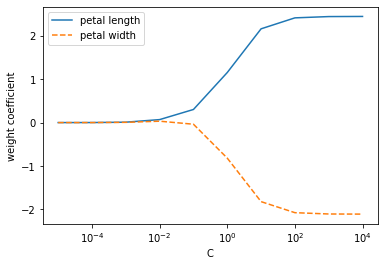

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

By executing the preceding code, we fitted ten logistic regression models with different values for the inverse-regularization parameter `C`. For the purposes of illustration, we only collected the weight coefficients of class 1 (here, the second class in the dataset, Iris-versicolor) versus all classifiers—remember that we are using the OvR technique for multiclass classification.

As we can see in the resulting plot, the weight coefficients shrink if we decrease parameter `C`, that is, if we increase the regularization strength.